# Smart meter in London
A smart meter is an electronic device that records information such as consumption of electric energy, voltage levels, current, and power factor.The  technology for smart meter systems is the information technology at the utility that integrates the Smart Meter networks with utility applications. This includes the Meter Data Management system. It also is essential for smart grid implementations that power line communication (PLC) technologies used within the home over a Home Area Network (HAN), are standardized and compatible. 

Environmental social science is faced with a significant difficulty when it comes to inspiring people to adopt transformational behaviors that are intended to lessen the negative consequences of climate change. In particular, it is still unclear how to effectively encourage the adoption of cutting-edge, digital technology for effective energy management.
The government wants energy providers to put smart meters in every home in England, Wales, and Scotland in order to track energy consumption. Energy providers need to reach more than 26 million houses in order to reach their 2020 target of installing smart meters in every home.
In order to improve our energy supply and combat climate change, the European Union has encouraged all of its member nations to consider installing smart meters.

# Load files and Data Preparation
The originally provided dataset contains 168 .csv files, each file contains approximately 1 million rows, and the total dataset was approximately 10 GB after decompression. Later, the files were merged to create 1 file for easier use. The dataset has 10 columns and 3536007 rows as you will notice below.


In [1]:
# inport libraries
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
import os
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

<ipython-input-1-cae71fdb6774>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
# Combining all blocks
# run only the firt time
'''for num in range(0,112):
    df = pd.read_csv("archive/daily_dataset/daily_dataset/block_"+str(num)+".csv")
    df.to_csv("hc_"+str(num)+".csv")

fout= open("energy.csv","a")
# first file:
for line in open("hc_0.csv"):
    fout.write(line)
# now the rest:    
for num in range(0,112):
    f = open("hc_"+str(num)+".csv")
    f.readline() # skip the header
    for line in f:
         fout.write(line)
    f.close()
fout.close()'''

'for num in range(0,112):\n    df = pd.read_csv("archive/daily_dataset/daily_dataset/block_"+str(num)+".csv")\n    df.to_csv("hc_"+str(num)+".csv")\n\nfout= open("energy.csv","a")\n# first file:\nfor line in open("hc_0.csv"):\n    fout.write(line)\n# now the rest:    \nfor num in range(0,112):\n    f = open("hc_"+str(num)+".csv")\n    f.readline() # skip the header\n    for line in f:\n         fout.write(line)\n    f.close()\nfout.close()'

At this point we will open the files we need to analyze the data.(energy.csv ,weather_daily_darksky.csv, uk_bank_holidays.csv)

In [3]:
energy = pd.read_csv('energy.csv')
energy.shape

(3536007, 10)

In [4]:
# energy dataframe include all info about energy
energy

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...,...
3536002,9903,MAC004828,2014-02-24,0.0225,0.053896,0.722,48,0.125341,2.587,0.000
3536003,9904,MAC004828,2014-02-25,0.0050,0.015000,0.051,48,0.017029,0.720,0.000
3536004,9905,MAC004828,2014-02-26,0.0110,0.021896,0.152,48,0.030538,1.051,0.000
3536005,9906,MAC004828,2014-02-27,0.0045,0.015333,0.092,48,0.020424,0.736,0.000


In [5]:
# delete the first column of energy dataframe
del energy[energy.columns[0]]
energy

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...
3536002,MAC004828,2014-02-24,0.0225,0.053896,0.722,48,0.125341,2.587,0.000
3536003,MAC004828,2014-02-25,0.0050,0.015000,0.051,48,0.017029,0.720,0.000
3536004,MAC004828,2014-02-26,0.0110,0.021896,0.152,48,0.030538,1.051,0.000
3536005,MAC004828,2014-02-27,0.0045,0.015333,0.092,48,0.020424,0.736,0.000


In [6]:
# weather dataframe include data about the weather for the days we want
weather = pd.read_csv('archive/weather_daily_darksky.csv')
weather

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,9.03,2014-01-26 16:00:00,233,partly-cloudy-day,2.39,2014-01-26 21:00:00,0.40,4.55,1002.10,2014-01-26 22:00:00,...,9.03,2014-01-26 07:48:49,2014-01-26 16:00:00,2014-01-26 11:00:00,Mostly cloudy until evening.,2014-01-27 05:00:00,-1.30,2014-01-26 15:00:00,2014-01-27 04:00:00,0.84
878,10.31,2014-02-27 14:00:00,224,partly-cloudy-day,3.08,2014-02-27 23:00:00,0.32,4.14,1007.02,2014-02-27 22:00:00,...,10.31,2014-02-27 06:51:45,2014-02-27 14:00:00,2014-02-27 12:00:00,Partly cloudy until evening.,2014-02-28 02:00:00,1.41,2014-02-27 14:00:00,2014-02-28 02:00:00,0.93
879,18.97,2014-03-09 14:00:00,172,partly-cloudy-night,4.30,2014-03-09 07:00:00,0.04,2.78,1022.44,2014-03-09 07:00:00,...,18.97,2014-03-09 06:29:49,2014-03-09 14:00:00,2014-03-09 12:00:00,Partly cloudy in the evening.,2014-03-10 05:00:00,7.08,2014-03-09 14:00:00,2014-03-10 06:00:00,0.28
880,8.83,2014-02-12 16:00:00,210,wind,1.94,2014-02-12 01:00:00,0.59,7.24,994.27,2014-02-12 01:00:00,...,8.83,2014-02-12 07:21:44,2014-02-12 16:00:00,2014-02-12 10:00:00,Mostly cloudy until evening and breezy through...,2014-02-13 05:00:00,-1.20,2014-02-12 16:00:00,2014-02-13 02:00:00,0.42


In [7]:
weather.shape

(882, 32)

In [8]:
bank_holidays_df = pd.read_csv("archive/uk_bank_holidays.csv")
bank_holidays_df.head()
#converting the bank holidays column to date type
bank_holidays_df['Bank holidays'] = pd.to_datetime(bank_holidays_df['Bank holidays'], format="%Y-%m-%d").dt.date
bank_holidays_df.rename(columns={'Bank holidays':'day'}, inplace=True)
bank_holidays_df.head()

,day,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


# Data Pre-Processing

In [9]:
#taking house ID, day and sum of the energy consumed for analysis
energy = energy[['LCLid','day','energy_sum']]
energy.head()

,LCLid,day,energy_sum
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769


In [10]:
housecount = energy.groupby('day')[['LCLid']].nunique()

In [11]:
energy = energy.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()
energy

,day,energy_sum,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41
...,...,...,...
824,2014-02-24,52867.660004,4994
825,2014-02-25,52330.109999,4995
826,2014-02-26,51804.199995,4993
827,2014-02-27,52580.878999,4990


In [12]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date

In [13]:
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Date of dataset start from ",min(energy.day), 'until', max(energy.day))

Date of dataset start from  2011-11-23 until 2014-02-28


In [14]:
energy.describe()

,energy_sum,LCLid,avg_energy
count,829.000000,829.000000,829.000000
mean,43535.325676,4234.539204,10.491862
std,20550.594031,1789.994799,1.902513
min,90.385000,13.000000,0.211766
25%,34665.436003,4084.000000,8.676955
50%,46641.160997,5138.000000,10.516983
75%,59755.616996,5369.000000,12.000690
max,84156.135002,5541.000000,15.964434


In [15]:
#choosing only the columns we are going to use for analysis
weather = weather.drop(columns=['icon', 'summary', 'precipType'])
weather.head()

,temperatureMax,temperatureMaxTime,windBearing,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,...,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,...,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,...,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,...,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,...,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,...,3.17,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [16]:
weather.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [17]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

In [18]:
weather_energy =  energy.merge(weather,on='day')
weather_energy

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2014-02-24,52867.660004,4994,10.586235,14.23,183,6.03,0.50,5.02,1005.19,...,13.00,0.74,4.78,14.23,1.0,8.25,7.99,14.23,5.52,0.82
824,2014-02-25,52330.109999,4995,10.476498,11.43,202,5.06,0.62,5.69,1000.65,...,12.09,0.78,1.67,11.43,1.0,4.17,6.79,10.31,3.89,0.86
825,2014-02-26,51804.199995,4993,10.375366,11.29,227,2.74,0.26,3.82,1012.73,...,13.00,0.73,3.03,11.29,2.0,6.01,4.17,11.29,1.67,0.90
826,2014-02-27,52580.878999,4990,10.537250,10.31,224,3.08,0.32,4.14,1007.02,...,12.04,0.74,0.82,10.31,2.0,3.43,3.93,10.31,1.41,0.93


In [19]:
#combine the master data created in the previous step with bank holidays data
weather_energy = weather_energy.merge(bank_holidays_df, on='day', how='left')

In [20]:
weather_energy.shape

(828, 22)

In [21]:
#Adding an indicator to know whether a particular day is holiday or not
weather_energy['is_a_holiday'] = np.where(weather_energy['Type'].isna(),0,1)
weather_energy['Type'].fillna('not-a-holiday', inplace=True)
weather_energy.head()

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Type,is_a_holiday
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94,not-a-holiday,0
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97,not-a-holiday,0
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01,not-a-holiday,0
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05,not-a-holiday,0
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08,not-a-holiday,0


In [22]:
#finding which column has missing values
weather_energy.isna().sum()

day                        0
energy_sum                 0
LCLid                      0
avg_energy                 0
temperatureMax             0
windBearing                0
dewPoint                   0
cloudCover                 0
windSpeed                  0
pressure                   0
apparentTemperatureHigh    0
visibility                 0
humidity                   0
apparentTemperatureLow     0
apparentTemperatureMax     0
uvIndex                    0
temperatureLow             0
temperatureMin             0
temperatureHigh            0
apparentTemperatureMin     0
moonPhase                  0
Type                       0
is_a_holiday               0
dtype: int64

In [23]:
#drop the missing records
weather_energy.dropna(inplace=True)

In [24]:
#number of unique days for which the data is present
print(weather_energy.day.nunique())

826


In [25]:
#checking the number of records
weather_energy.shape 

(828, 23)

In [26]:
# Creating seperate dataframe to get day of the week from the dates
date_df = weather_energy

In [27]:
# Converting the day column to datetime format and the days are extracted
date_df['day'] = pd.to_datetime(date_df['day'],format='%Y-%m-%d')
date_df['day_of_the_week'] = date_df['day'].dt.day_name()

Text(0, 0.5, 'Average Energy Consumed')

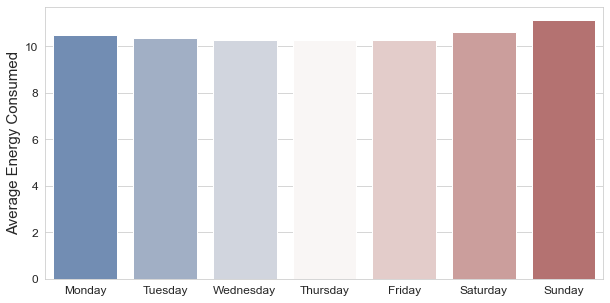

In [28]:
# Bar chart to visualise the average energy consumed per day

plt.rcParams.update({'font.size': 12})
sns.set_style(style="whitegrid")
plt.figure(figsize=(10,5))
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax = sns.barplot(x='day_of_the_week',y='avg_energy',data=date_df,palette="vlag",order=week,ci=None)
plt.xlabel(None)
plt.ylabel('Average Energy Consumed',size=15)

<AxesSubplot:>

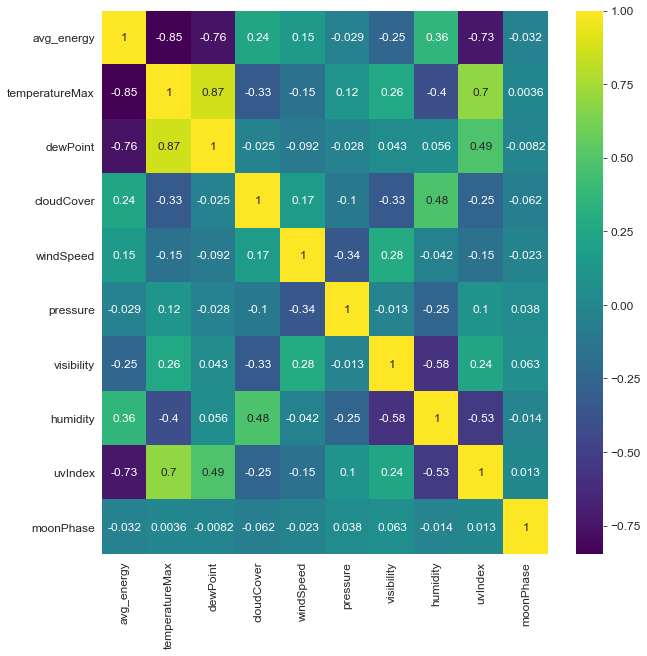

In [29]:
#Heat map to identify correlation between average energy and weather features
cor_matrix = weather_energy[['avg_energy','temperatureMax','dewPoint', 'cloudCover', 'windSpeed','pressure', 'visibility', 'humidity','uvIndex', 'moonPhase']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_matrix,annot=True,cmap='viridis')

At this point we are interested in analyzing the elements with the highest correlation based on energy. We observe that temperature, uv and dew point have a negative correlation with energy

No handles with labels found to put in legend.


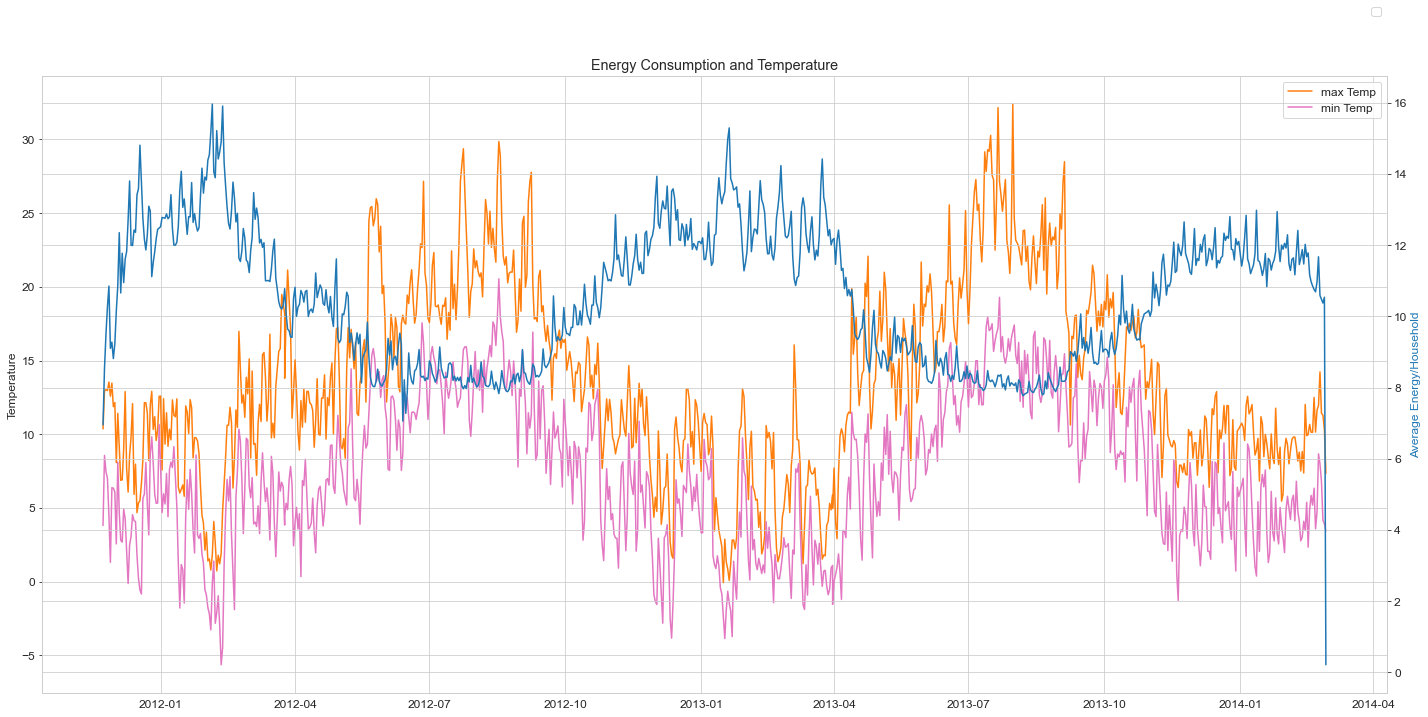

In [30]:
fig, ax1 = plt.subplots(figsize = (20,10))
ax1.plot(weather_energy.day, weather_energy.temperatureMax, color = 'tab:orange', label = "max Temp")
ax1.plot(weather_energy.day, weather_energy.temperatureMin, color = 'tab:pink', label = "min Temp")
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

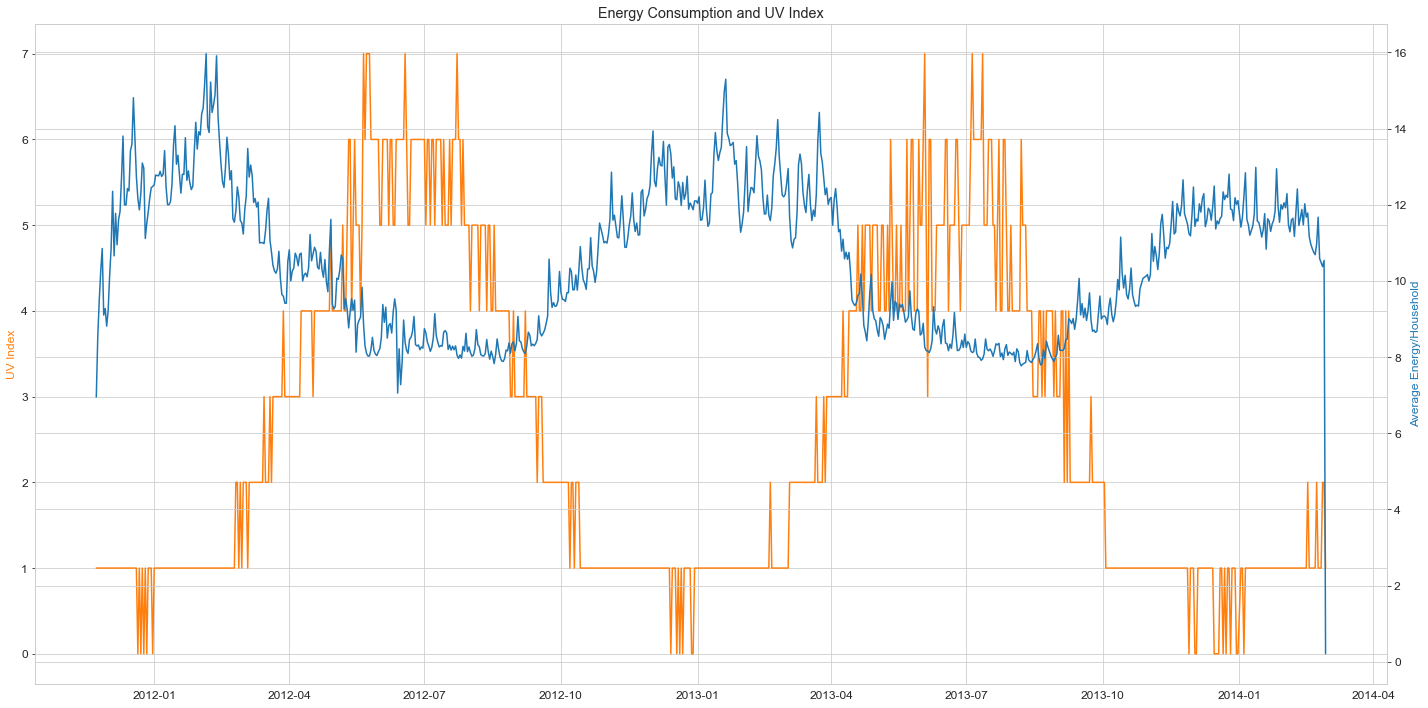

In [31]:
fig, ax1 = plt.subplots(figsize = (20,10))
ax1.plot(weather_energy.day, weather_energy.uvIndex, color = 'tab:orange')
ax1.set_ylabel('UV Index',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and UV Index')
fig.tight_layout()
plt.show()

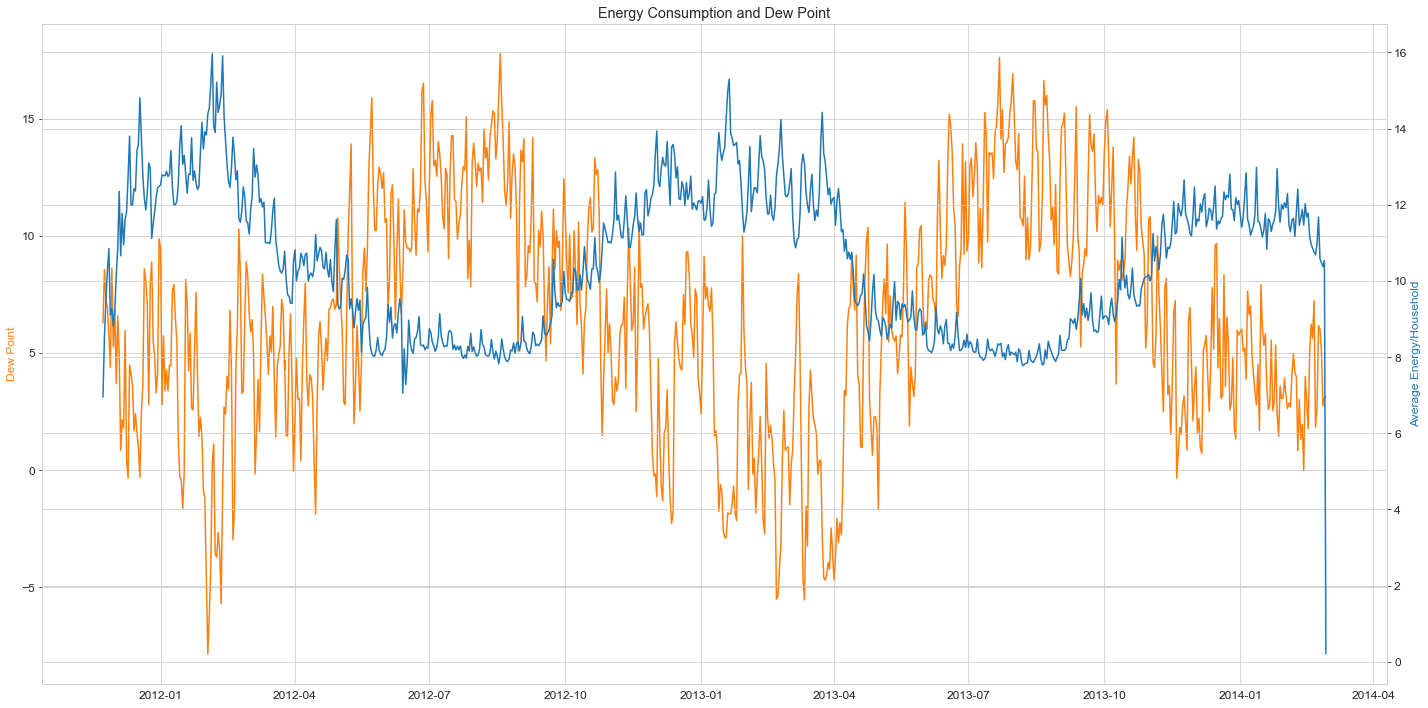

In [32]:
fig, ax1 = plt.subplots(figsize = (20,10))
ax1.plot(weather_energy.day, weather_energy.dewPoint, color = 'tab:orange')
ax1.set_ylabel('Dew Point',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Dew Point')
fig.tight_layout()
plt.show()

### Creating Weather Clusters 
The weather information has a lot of variables- which might not all be useful. We will attempt to create weather clusters to see if we can define a weather of the day based on the granular weather data like temperature, precipitation etc.

In [33]:
# Declaring min max scaler
scaler = MinMaxScaler()

In [34]:
# Scaling and transforming the input features
weather_energy_scaled = scaler.fit_transform(weather_energy[['temperatureMax','humidity','windSpeed']])

In [35]:
#Fitting the input to K-means model and adding the cluster labels to the main dataframe 
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(weather_energy_scaled)
weather_energy['weather_cluster'] = kmeans.labels_

# ML model

In [36]:
weather_energy['Year'] = pd.DatetimeIndex(weather_energy['day']).year  
weather_energy['Month'] = pd.DatetimeIndex(weather_energy['day']).month
weather_energy.set_index(['day'],inplace=True)

In [37]:
input_model = weather_energy[['avg_energy','weather_cluster','is_a_holiday']]
train = input_model.iloc[0:(len(input_model)-30)]
test = input_model.iloc[len(train):(len(input_model)-1)]

<AxesSubplot:xlabel='day'>

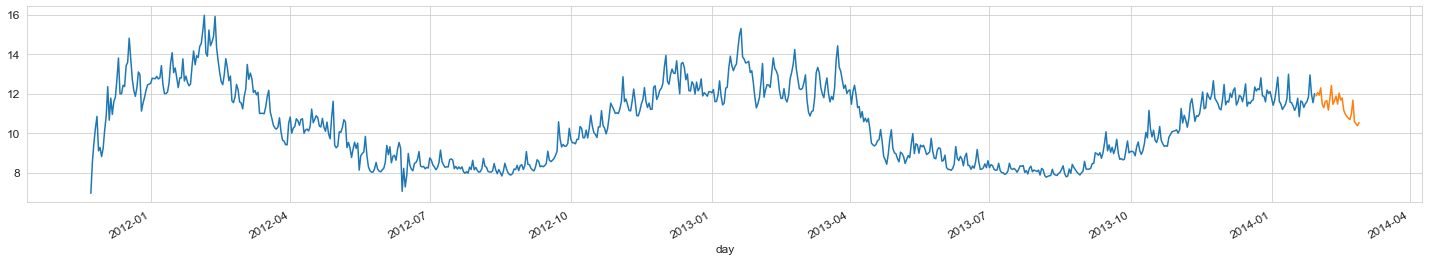

In [38]:
train['avg_energy'].plot(figsize=(25,4))
test['avg_energy'].plot(figsize=(25,4))

In [39]:
test

,avg_energy,weather_cluster,is_a_holiday
day,,,
2014-01-30,11.886982,0,0
2014-01-31,12.051321,0,0
2014-02-01,11.921217,1,0
2014-02-02,12.291726,1,0
2014-02-03,11.471760,1,0
2014-02-04,11.288728,1,0
2014-02-05,11.602300,1,0
2014-02-06,11.644153,1,0
2014-02-07,11.168278,1,0


## ACF-PACF

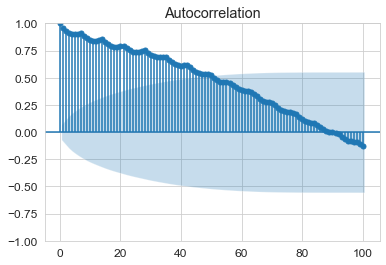

In [43]:
plot_acf(train.avg_energy,lags=100)
plt.show()

C:\Users\Marko\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


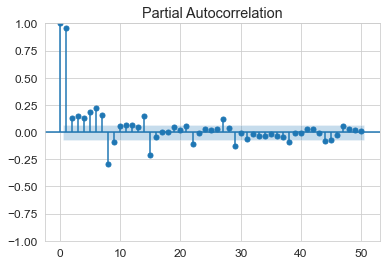

In [44]:
plot_pacf(train.avg_energy,lags=50)
plt.show()

While the partial autocorrelation plot reveals a dramatic reduction after the first lag, the autocorrelation plot displays a progressive deterioration. This suggests that the k = 1 lag successfully explains the majority of the higher-order autocorrelations. As a result, the series features AR's "signature."

We can say that data is not stationary, since p value is more than 0.05

In [45]:
t = sm.tsa.adfuller(train.avg_energy, autolag='AIC')
pd.Series(t[0:4], index=['Statistic Test','p value','No of lags','No of obeservations'])

Statistic Test          -1.872794
p value                  0.344966
No of lags              21.000000
No of obeservations    776.000000
dtype: float64

In [46]:
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset.iloc[i] - dataset.iloc[i - interval]
        diff.append(value)
    return diff

In [47]:
t = sm.tsa.adfuller(difference(train.avg_energy,1), autolag='AIC')
pd.Series(t[0:4], index=['Statistic Test','p value','No of lags','No of obeservations'])

Statistic Test        -6.715004e+00
p value                3.600554e-09
No of lags             2.000000e+01
No of obeservations    7.760000e+02
dtype: float64

In [48]:
k = sm.tsa.seasonal_decompose(train.avg_energy.dropna(), model='additive', period=12)

<AxesSubplot:xlabel='day'>

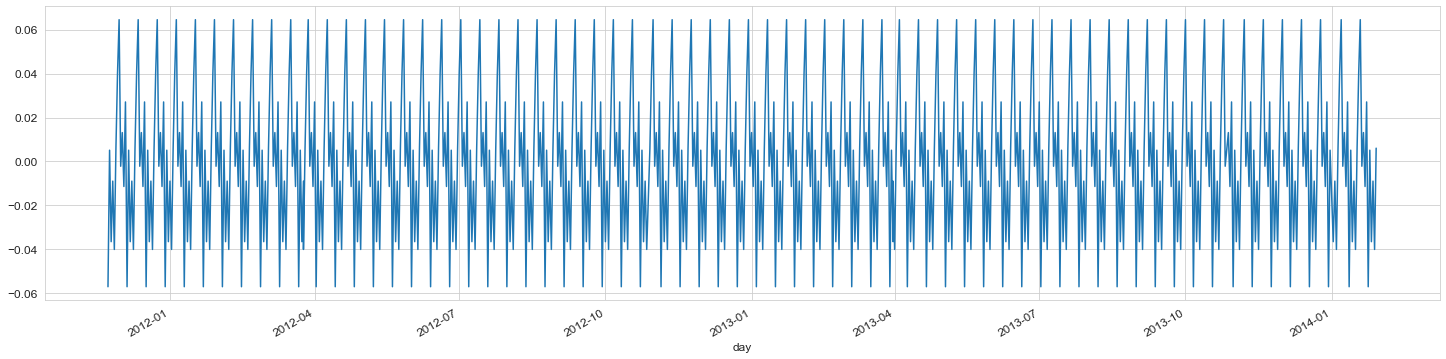

In [49]:
k.seasonal.plot(figsize=(25,6))

<AxesSubplot:xlabel='day'>

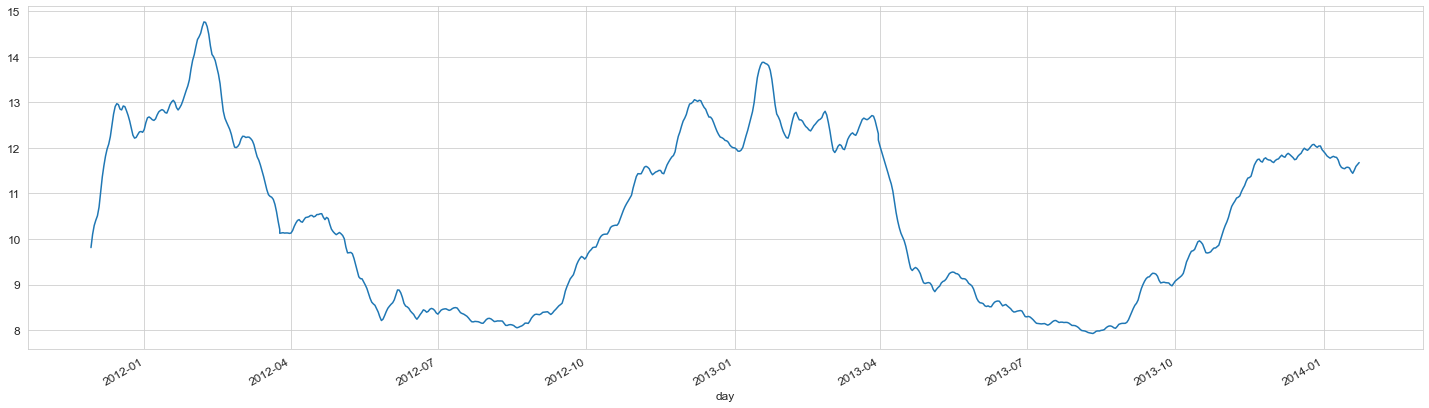

In [50]:
k.trend.plot(figsize=(25,7))

<AxesSubplot:xlabel='day'>

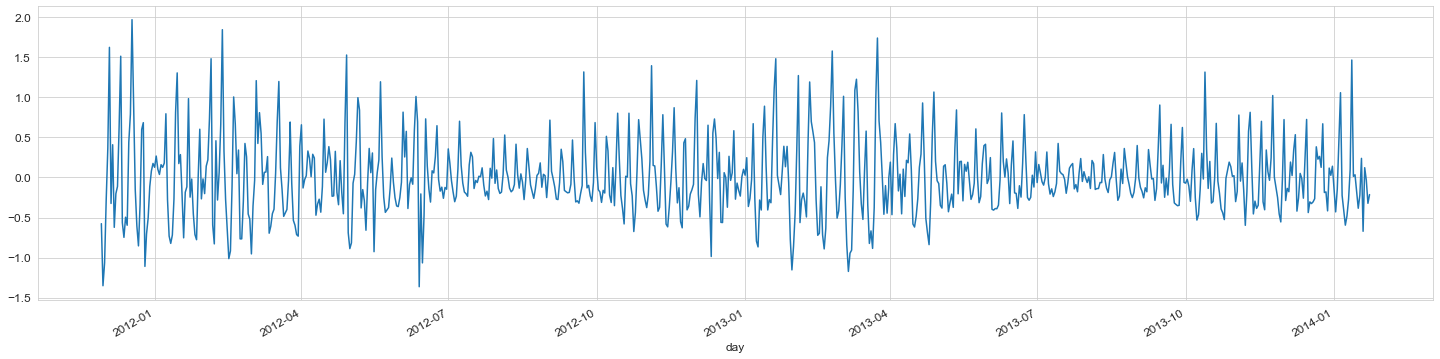

In [51]:
k.resid.plot(figsize=(25,6))

Warnings:

[1] Covariance matrix calculated using the outer product of gradients (complex-step).

[2] Covariance matrix is singular or near-singular, with condition number 6.68e+14. Standard errors may be unstable.

## Model Fit

In [53]:
endog = train['avg_energy']
exog = sm.add_constant(train[['weather_cluster','is_a_holiday']])

mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=(7,1,1),seasonal_order=(1,1, 0, 12),trend='n')
model_fit = mod.fit()
model_fit.summary()

C:\Users\Marko\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Marko\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          avg_energy   No. Observations:                  798
Model:             SARIMAX(7, 1, 1)x(1, 1, [], 12)   Log Likelihood                -649.433
Date:                             Fri, 20 Jan 2023   AIC                           1324.866
Time:                                     23:02:55   BIC                           1385.519
Sample:                                          0   HQIC                          1348.187
                                             - 798                                         
Covariance Type:                               opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.017e-08   2.99e+05  -1.01e-13      1.000   -5.86e+05    5.86e+05
weather_cluster    -0.0066      0.016     -0.403      0.687      -0.039       0.026
is_a_holiday       -0.0361      0.088     -0.410      0.682      -0.209       0.136
ar.L1              -0.0018      0.087     -0.021      0.983      -0.172       0.168
ar.L2              -0.1538      0.032     -4.817      0.000      -0.216      -0.091
ar.L3              -0.1436      0.039     -3.695      0.000      -0.220      -0.067
ar.L4              -0.1511      0.038     -3.979      0.000      -0.225      -0.077
ar.L5              -0.1636      0.040     -4.104      0.000      -0.242      -0.085
ar.L6               0.0087      0.036      0.240      0.810      -0.062       0.080
ar.L7               0.3524      0.029     12.311      0.000       0.296       0.409
ma.L1              -0.1846      0.092     -2.017      0.044      -0.364      -0.005
ar.S.L12           -0.4841      0.033    -14.780      0.000      -0.548      -0.420
sigma2              0.3041      0.013     23.851      0.000       0.279       0.329
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                45.89
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.11e+14. Standard errors may be unstable.
"""

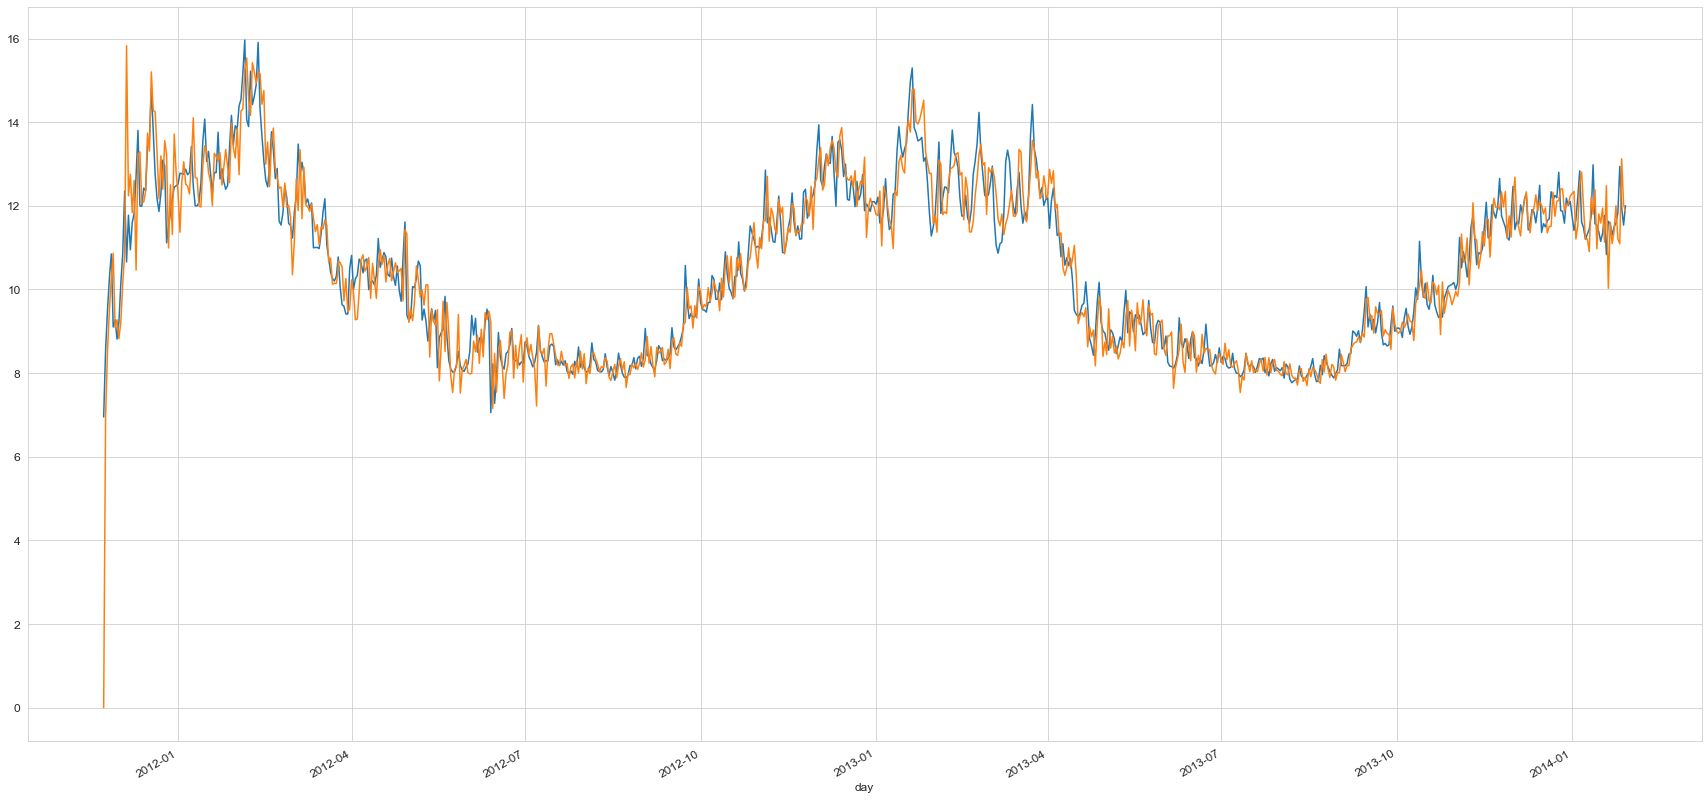

In [54]:
train['avg_energy'].plot(figsize=(30,15))
model_fit.fittedvalues.plot()
plt.show()

## Prediction

In [55]:
predict = model_fit.predict(start = len(train),end = len(train)+len(test)-1,exog = sm.add_constant(test[['weather_cluster','is_a_holiday']]))
test['predicted'] = predict.values
test.tail(5)

C:\Users\Marko\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Marko\AppData\Local\Temp/ipykernel_18408/2164852849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predict.values


,avg_energy,weather_cluster,is_a_holiday,predicted
day,,,,
2014-02-23,11.673756,2,0,11.713184
2014-02-24,10.586235,2,0,10.866843
2014-02-25,10.476498,2,0,11.611888
2014-02-26,10.375366,2,0,12.055503
2014-02-27,10.537250,2,0,11.676728


In [56]:
test['residual'] = abs(test['avg_energy']-test['predicted'])
MAE = test['residual'].sum()/len(test)
MAPE = (abs(test['residual'])/test['avg_energy']).sum()*100/len(test)
print("MAE:", MAE)
print("MAPE:", MAPE)

MAE: 0.6268754115106373
MAPE: 5.6370280953304075


C:\Users\Marko\AppData\Local\Temp/ipykernel_18408/2334414777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['residual'] = abs(test['avg_energy']-test['predicted'])


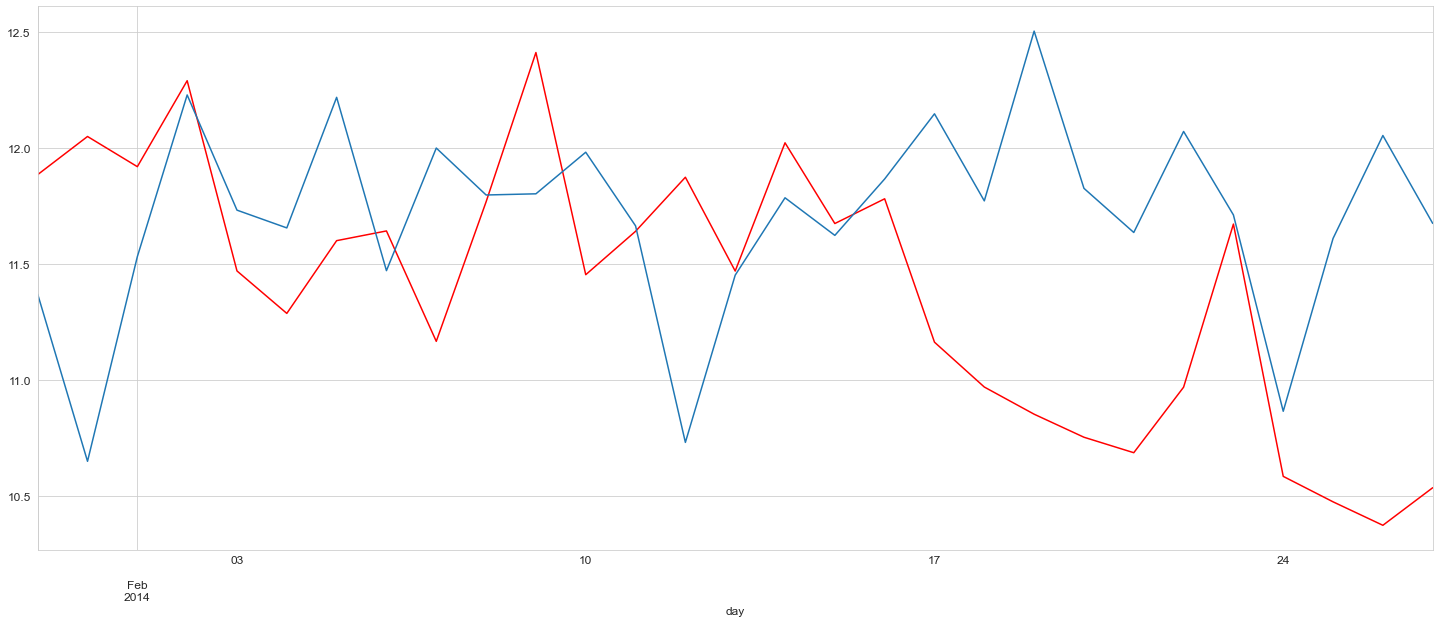

In [57]:
test['avg_energy'].plot(figsize=(25,10),color = 'red')
test['predicted'].plot()
plt.show()

<AxesSubplot:xlabel='day'>

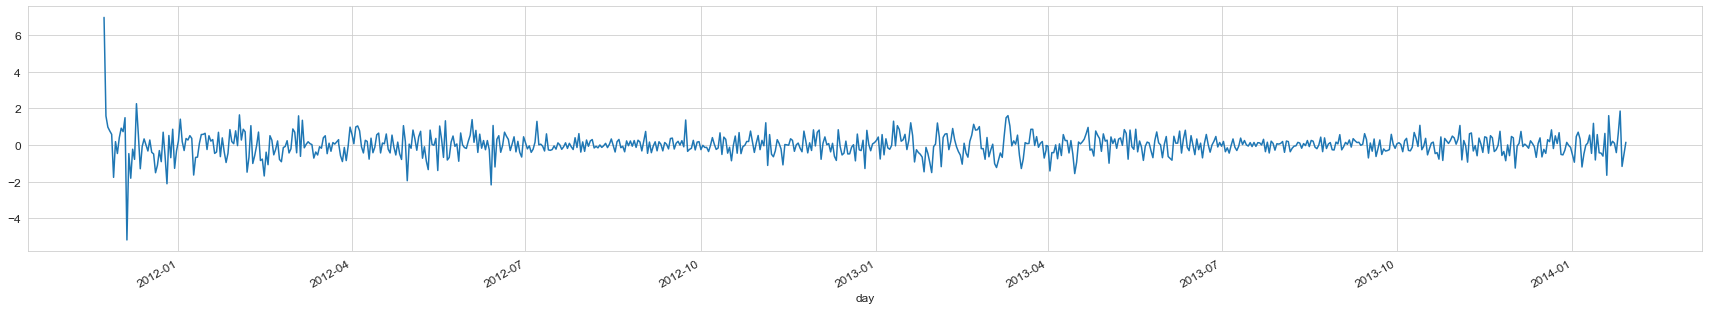

In [59]:
model_fit.resid.plot(figsize= (30,5))

<AxesSubplot:xlabel='day'>

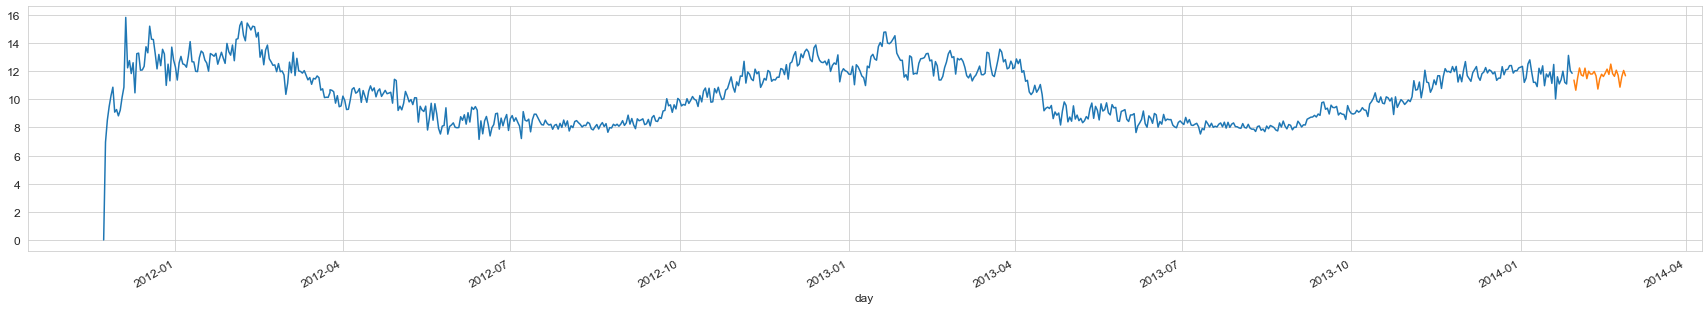

In [60]:
model_fit.fittedvalues.plot(figsize = (30,5))
test.predicted.plot()

In [61]:
test['predicted'].tail(5)

day
2014-02-23    11.713184
2014-02-24    10.866843
2014-02-25    11.611888
2014-02-26    12.055503
2014-02-27    11.676728
Name: predicted, dtype: float64

## LSTM

We're going to turn this into a supervised issue using delays up to 7 days. I used Jason Brownlee's [tutorial](http://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/) to understand how to produce lags. The same technique has also been used to put multivariate data into a supervised dataframe, which LSTM has then been applied to.

In [62]:
np.random.seed(11)
dataframe = weather_energy.loc[:,'avg_energy']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [63]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [64]:
reframed = series_to_supervised(dataset, 7,1)
reframed.head(3)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,6.952693,8.536480,9.499782,10.267707,10.850805,9.103382,9.274873,8.813513
8,8.536480,9.499782,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707
9,9.499782,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910


In [68]:
reframed['weather_cluster'] = weather_energy.weather_cluster.values[7:]
reframed['is_a_holiday']= weather_energy.is_a_holiday.values[7:]

In [69]:
reframed = reframed.reindex(['weather_cluster', 'is_a_holiday','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'], axis=1)
reframed = reframed.values

### Normalization

In [70]:
scaler = MinMaxScaler(feature_range=(0, 1))
reframed = scaler.fit_transform(reframed)

In [71]:
# split into train and test sets
train = reframed[:(len(reframed)-30), :]
test = reframed[(len(reframed)-30):len(reframed), :]

In [72]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [73]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(791, 1, 9) (791,) (30, 1, 9) (30,)


### Mondelling

Epoch 1/50
11/11 - 2s - loss: 0.5630 - 2s/epoch - 156ms/step
Epoch 2/50
11/11 - 0s - loss: 0.4361 - 53ms/epoch - 5ms/step
Epoch 3/50
11/11 - 0s - loss: 0.2990 - 31ms/epoch - 3ms/step
Epoch 4/50
11/11 - 0s - loss: 0.1553 - 29ms/epoch - 3ms/step
Epoch 5/50
11/11 - 0s - loss: 0.1053 - 37ms/epoch - 3ms/step
Epoch 6/50
11/11 - 0s - loss: 0.1065 - 47ms/epoch - 4ms/step
Epoch 7/50
11/11 - 0s - loss: 0.0963 - 53ms/epoch - 5ms/step
Epoch 8/50
11/11 - 0s - loss: 0.0886 - 57ms/epoch - 5ms/step
Epoch 9/50
11/11 - 0s - loss: 0.0816 - 46ms/epoch - 4ms/step
Epoch 10/50
11/11 - 0s - loss: 0.0758 - 38ms/epoch - 3ms/step
Epoch 11/50
11/11 - 0s - loss: 0.0702 - 33ms/epoch - 3ms/step
Epoch 12/50
11/11 - 0s - loss: 0.0645 - 35ms/epoch - 3ms/step
Epoch 13/50
11/11 - 0s - loss: 0.0589 - 26ms/epoch - 2ms/step
Epoch 14/50
11/11 - 0s - loss: 0.0537 - 35ms/epoch - 3ms/step
Epoch 15/50
11/11 - 0s - loss: 0.0488 - 37ms/epoch - 3ms/step
Epoch 16/50
11/11 - 0s - loss: 0.0439 - 33ms/epoch - 3ms/step
Epoch 17/50
11/11

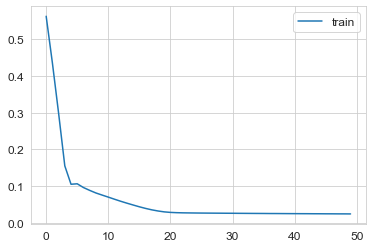

In [75]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

**Prediction**

In [76]:
# make a prediction
yhat = model.predict(test_X)

In [77]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[2])

In [78]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)

In [79]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)

In [80]:
act = [i[9] for i in inv_y] # last element is the predicted average energy
pred = [i[9] for i in inv_yhat] # last element is the actual average energy

# calculate RMSE
import math
rmse = math.sqrt(mean_squared_error(act, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.000


**Performance**

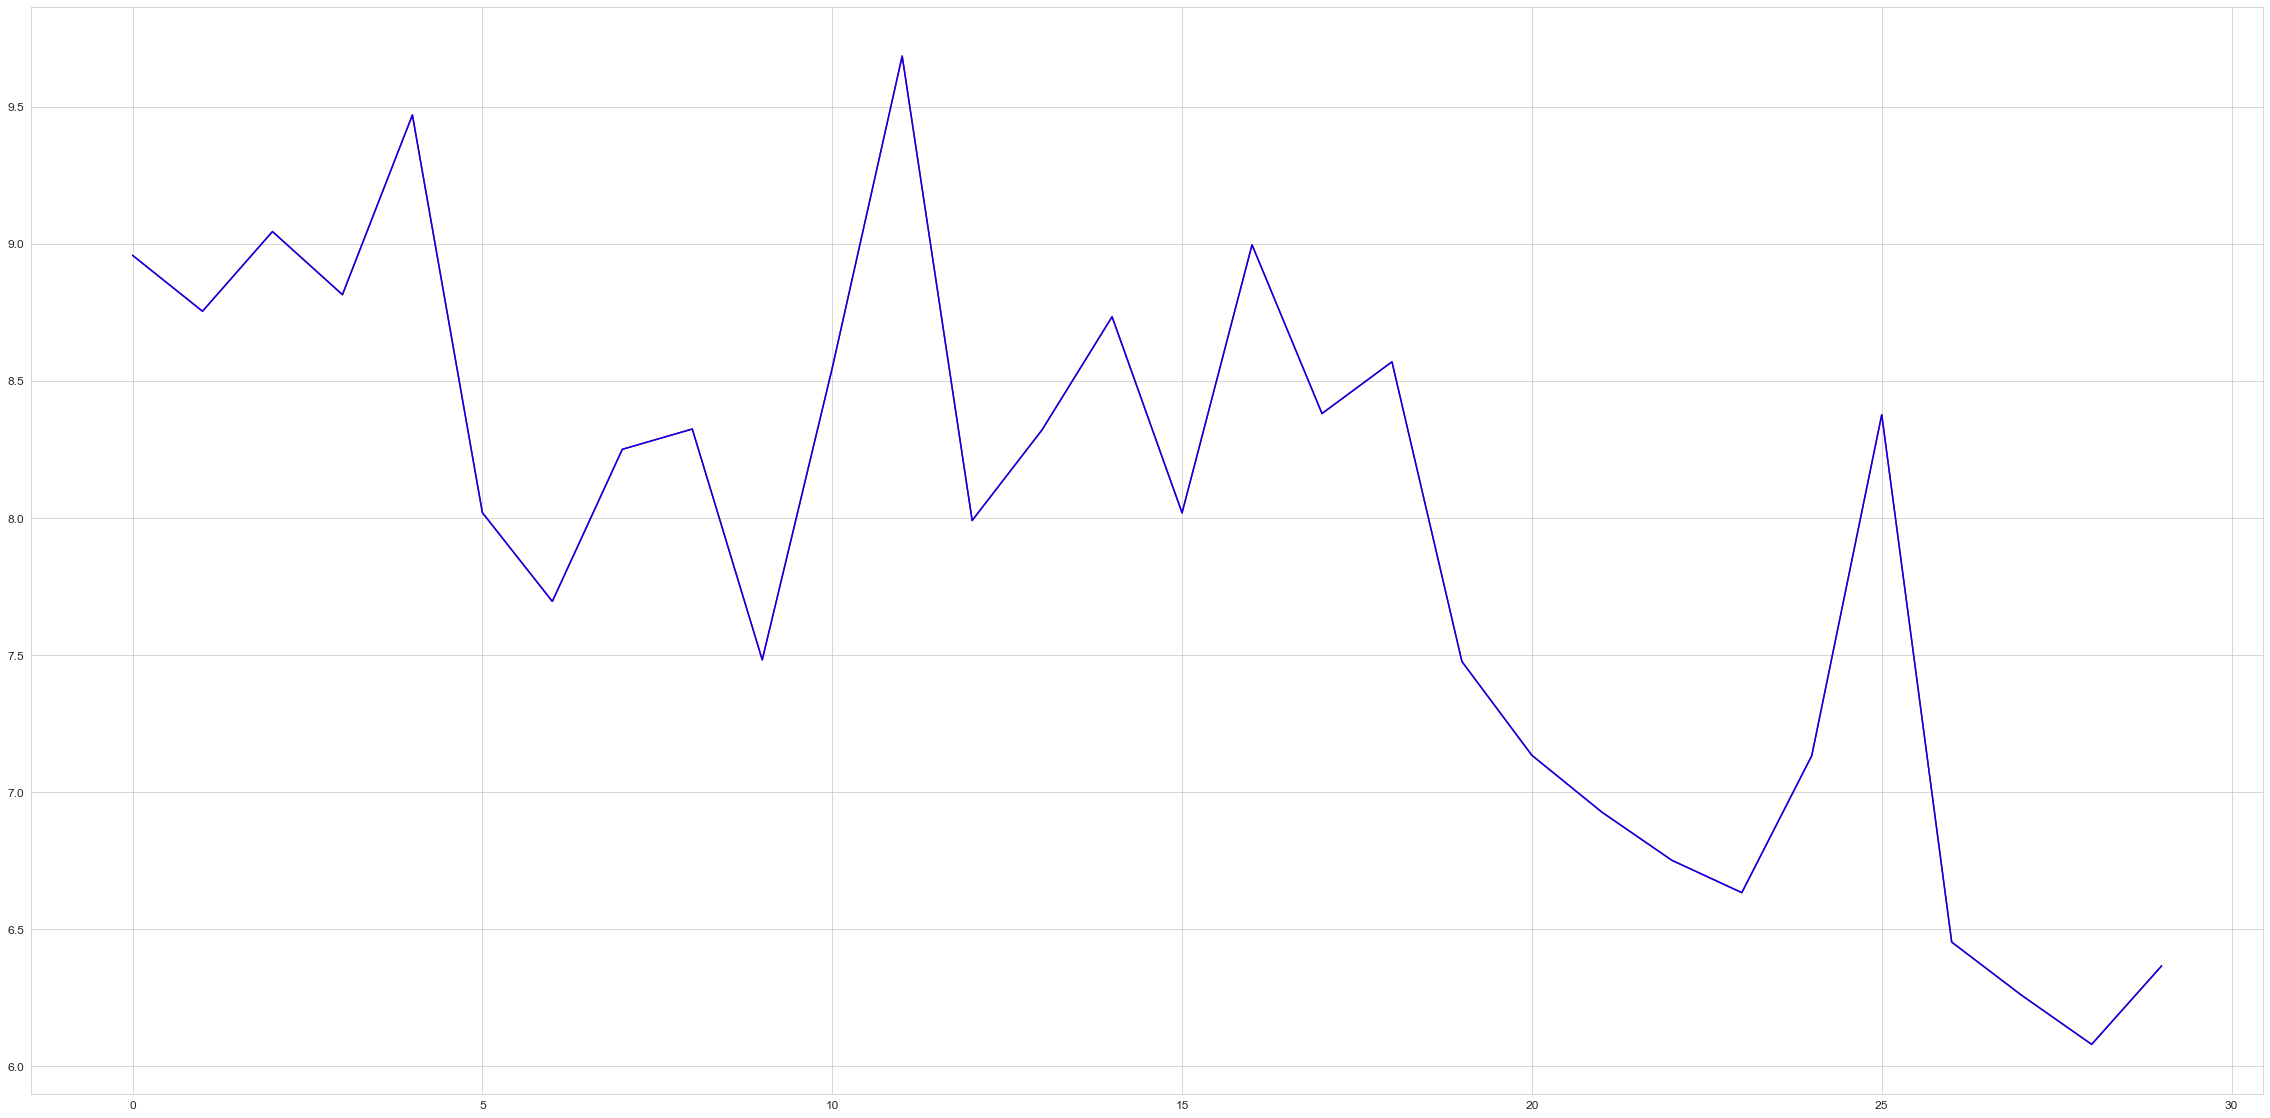

In [82]:
predicted_lstm = pd.DataFrame({'predicted':pred,'avg_energy':act})
predicted_lstm['avg_energy'].plot(figsize=(40,20),color = 'red')
predicted_lstm['predicted'].plot(color = 'blue')
plt.show()